## PART C.  Regression Neural Network Model
### Normalized Data
#### Predicting Concrete Strength
Hidden layer of 10 nodes, activation f: RelU, optimizer: adam and  
loss: MSE, Train 100 epochs, 100 Iterations for MSE

##### Import functions required and the Keras objects library

In [2]:
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib import pyplot

print ("Ready, Set, Go!!!!!!!")

Ready, Set, Go!!!!!!!


 ### Build the neural network

##### Import Data - preprocess

In [3]:
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.4


In [4]:
concrete_data.isnull().sum(); #Check for null values

##### Define predictors and target

In [5]:
concrete_data_columns = concrete_data.columns
#SET TARGET VARIABLE - STRENGTH
target = concrete_data['Strength']
#SET PREDICTORS TO BE ALL OTHER COLUMNS
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]

##### Check data size

In [6]:
#TARGET - STRENGTH COLUMN
shape = concrete_data.shape
print('\nNumber of samples/rows :', shape[0])
target.tail(1)


Number of samples/rows : 1030


1029    32.4
Name: Strength, dtype: float64

#### Normalize data by substracting the mean and dividing by the standard deviation.

##### Define Target and Predictors

In [7]:
#NORMALIZE TARGET and PREDICTORS
target_norm = (target - target.mean()) / target.std()
predictors_norm = (predictors - predictors.mean()) / predictors.std()
#predictors_norm.head() #check
target_norm.tail(2) #check

1028   -0.182450
1029   -0.204598
Name: Strength, dtype: float64

In [8]:
cols = predictors_norm.shape[1]
predictors_norm.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1029,-0.193939,0.308349,0.376762,0.891286,0.400971,-1.394385,-0.150675,-0.279597


#### Develop Baseline Regression Model

In [9]:
#SET  VARIABLES FOR THE BASELINE MODEL
nodes = 10
output = 1

# define base regression model
def regression_model(nodes):
    # create model
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) #1 hidden layer , 10 nodes, relu activation
    model.add(Dense(output)) #Output Layer
        # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Split Train/Test Data - Step 1

In [11]:
#SET SEED A FIXED VALUE FOR REPRODUCITY
import numpy
seed = 7
numpy.random.seed(seed)

# Split Train/Test Data
X = predictors_norm
y = target_norm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
train_test_split(y, shuffle=True);

### Train and Evaluate Model - Steps 2,3 and  
### Iterations - Step 4

#### Define and compile baseline regression model

In [12]:
nodes = 10
output = 1

# define base regression model
def regression_model(nodes):
    # create model
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) #1 hidden layer , 10 nodes, relu activation
    model.add(Dense(output)) #Output Layer
        # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### Initialize the Model, Split Train/Test Data, Train Model, Evaluate and List MSE

In [13]:
#USED TO MONITOR OUTPUT IN A SINGLE LINE
from IPython.display import display, clear_output

#SET VARIABLES FOR THE ASSIGNMENTS THAT WILL CHANGE IN ASSIGNMENTS
epochs = 100
b = 32
Clist = []

#SET SEED A FIXED VALUE FOR REPRODUCITY
import numpy
seed = 7
numpy.random.seed(seed)

#SET THE PROGRESS COUNTDOWN n
n = 0
iterations = 100
i = 0

# HERE WE GO!
for i in range(iterations):
    
    #To monitor will set up a countER
    clear_output(wait=True)            # Print and "overwrite" all print statements sequentially
    n = i + 1                          # Counter less the index for report
    print("Iteration {} ".format(n) + "..... Training is in progress.")
        
#Initialize the model
    model = regression_model(nodes)

# Split Train/Test Data
    X = predictors_norm
    y = target_norm
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
    train_test_split(y, shuffle=True)

# Train / fit the model
    model.fit(X, y, validation_split=0.3, epochs=epochs, batch_size=b, verbose=0, shuffle=True)
    prediction = model.predict(X)
    prediction
        
# Calculate MSE of EACH iteration
    mse = mean_squared_error(target_norm,prediction)

# Create a list of MSE's, add each one to a list
    Clist.append(mse)
    
result = np.array(Clist)
print ("Training is complete for {} iterations! ".format(n))
result

Iteration 100 ..... Training is in progress.
Training is complete for 100 iterations! 


array([0.18266348, 0.22043168, 0.18776568, 0.24920727, 0.21737138,
       0.15853859, 0.20700294, 0.18236905, 0.29578347, 0.27778239,
       0.23317602, 0.23021778, 0.26165535, 0.17589133, 0.28203225,
       0.21197573, 0.20441602, 0.24660131, 0.21391104, 0.18043816,
       0.18182084, 0.18367347, 0.22220999, 0.18801008, 0.23435539,
       0.19556435, 0.17413295, 0.22685018, 0.25097076, 0.20842047,
       0.22358459, 0.20563096, 0.19004976, 0.18597302, 0.25133994,
       0.25859215, 0.21404634, 0.2321946 , 0.23274961, 0.19203748,
       0.24748011, 0.2442071 , 0.18462254, 0.22576044, 0.258692  ,
       0.24704125, 0.36404763, 0.25559297, 0.28783496, 0.22226687,
       0.24338616, 0.22710477, 0.2473916 , 0.21488788, 0.19959997,
       0.27828695, 0.2285777 , 0.16943008, 0.21871938, 0.24456998,
       0.20002516, 0.19170974, 0.21438798, 0.26534469, 0.25361457,
       0.20846903, 0.22724394, 0.1877669 , 0.18095546, 0.20270205,
       0.18122813, 0.21854964, 0.17583099, 0.27457153, 0.19828

### C5. Final Report
Calculate and print mean and standard deviation of the mean squared errors of each iteration.

In [16]:
mse_mean = (numpy.mean(result))
mse_stddev = (numpy.std(Clist))

print("FINAL REPORT:")
print("MSE Mean: %.3f" % (mse_mean))
print("MSE Standard Deviation: %.3f" % (mse_stddev))

FINAL REPORT:
MSE Mean: 0.224
MSE Standard Deviation: 0.035


### Part C Observations
How does the final mean squared errors compare to that from Part B?  
*Part C trained with double the iterations and improved.*  
It had a percentage decrease of 18.545%. Reference Part B here;  
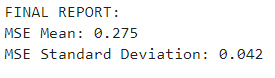

#### *Optional - Data Visualization*

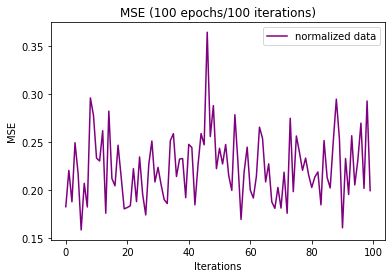

In [14]:
#DATA VISUALIZATION OF MSE CHANGE and save to png
plt.plot(Clist, label= 'normalized data', color='purple')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE (100 epochs/100 iterations)')
plt.legend(loc = 'best')
plt.savefig('fig-msePartC.png')
plt.show()

Part B shown for reference:  
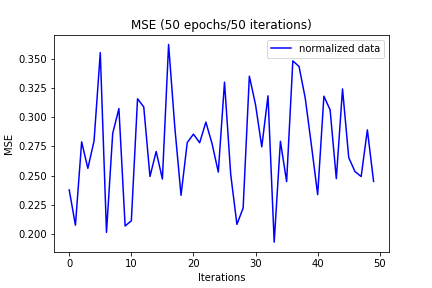

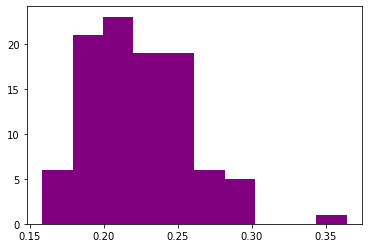

In [15]:
pyplot.hist(result, color="purple")
pyplot.savefig('fig-msePartChist.png')
pyplot.show()

Part B Histogram shown below for reference:  
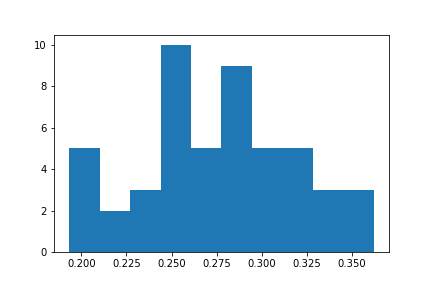